## Iris classification

Classify lily species based on features: sepal_length, sepal_width, petal_length, petal_width



In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [551]:
# read csv file
data = pd.read_csv('./data/irisdata.csv')

### Exploratory Data Analysis

In [552]:
# add columns
data.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [553]:
# peek at the data: check first 5 rows
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### preprocessing, cleansing

In [554]:
# check for nan
data.isnull().values.any()

False

no NaN (null, empty) values

### Statistical summary

statistical summary of all attributes

In [555]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


statistical summary by class variable, 

In [556]:
species = data.groupby('species').describe()

# transposed index and columns.
species.T 

species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    49.000000        50.000000       50.000000
             mean      5.004082         5.936000        6.588000
             std       0.355879         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    49.000000        50.000000       50.000000
             mean      3.416327         2.770000        2.974000
             std       0.384787         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.100000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.700000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    49.000000        50.000000       50.000000
             mean      1.465306         4.260000        5.552000
             std       0.175061         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.600000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    49.000000        50.000000       50.000000
             mean      0.244898         1.326000        2.026000
             std       0.108130         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

### Visualization

#### Univariate plots 
on single features:  sepal-length, sepal-width, petal-length, petal-width


In [557]:
# exclude species (target) from graphs (all rows, first 4 columns)
df = data.iloc[:, :4]


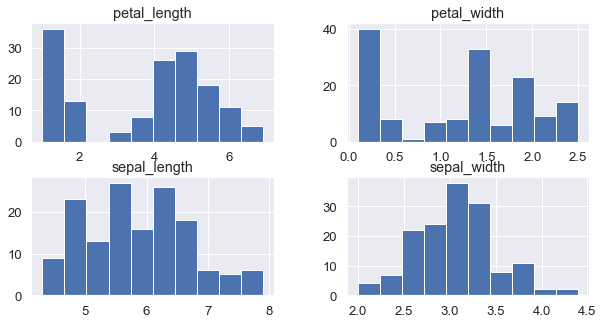

In [558]:
# histogram
df.hist(figsize = (10,5))
plt.show()

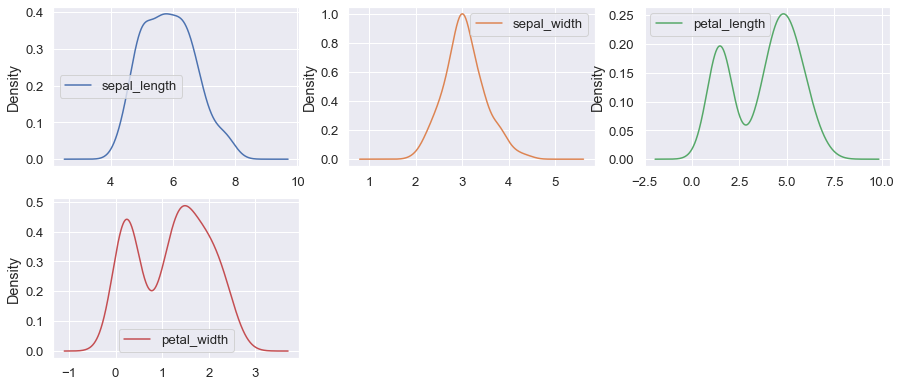

In [559]:
# density plots
df.plot(figsize=(15,10), kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

petal length, petal width are multimodal distribution (2 peaks) vs sepal length and sepal width which has a more normal distribution

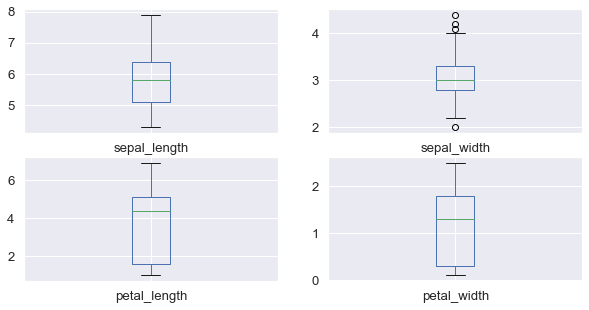

In [560]:
df.plot(figsize=(10,5), kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

sepal width has outliers (extreme values) on both the low and high extremities. <br>
petal length and width are left skewed.

#### multivariate plots
relationship between features

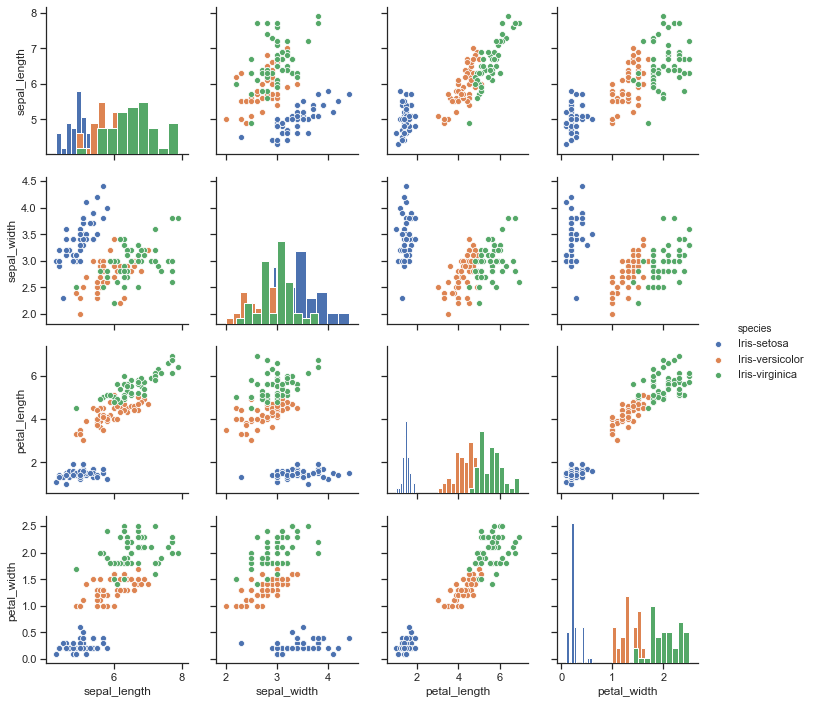

In [561]:
import seaborn as sns

sns.set(style='ticks', color_codes=True)
sns.pairplot(data, hue='species', diag_kind='hist');

In [562]:
# correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


strong positive correlation between:
- petal length and sepal length, 
- petal width and sepal length, 
- petal length and petal width

## Machine Learning Models

#### common supervised classification models

- decision trees
- k-nearest neighbor
- Naive Bayes
- Random Forests
- SVM and Multinomial logistic regression


In [563]:
print(data["species"].value_counts())
data.head()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### split train and test 


In [564]:
#!pip install scikit-learn==0.23.1  
#!pip install matplotlib==3.1.2     

#from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns

 
# confusion matrix
def plot_confusion_matrix(data, labels):
   
    sns.set(color_codes=True)
    sns.set(font_scale=1.2)
    
    plt.figure(1, figsize=(8, 5))
    plt.title("Confusion Matrix")
 
    ax = sns.heatmap(data, annot=True, 
                      cbar=False, square=True,
                     cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    
    # set the heatmap limits manually fix first and last row cut-off
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel="True label", xlabel="Predicted label")
    

# model accuracy assessment
def check_accuracy(test, predictions):
    print(classification_report(y_test, y_predictions, digits=3))
    
    cm = confusion_matrix(test, predictions)
    class_names = test.species.unique()
    plot_confusion_matrix(cm, list(class_names))
    

In [565]:
# specify the features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = data[features].copy()
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [566]:
# specify the target from a copy of the original data
y = data[['species']].copy()
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


train and split the data, 70% training and 30% test <br>

**random_state** is used to initialize the internal random number generator, which decides the
splitting of data into train and test. It can be 0 or 1 or any other integer. It should be the same
value to validate processing over multiple runs of the code for consistent results.

In [568]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [569]:
print ('data size:', len(data))

# training set
print(f'train shape: features {X_train.shape}, target {y_train.shape}')

# testing set
print(f'test  shape: features {X_test.shape}, target {y_test.shape}')


data size: 149
train shape: features (104, 4), target (104, 1)
test  shape: features (45, 4), target (45, 1)


Observe data split into 30% test (eg: size of 45) and 70% train (size of 104)

### Train and Make predictions

If we have an idea of which algorithms we might want to use for our dataset, we can use cross validation to estimate a model's performance before training the model and making predictions. See:
<p>https://scikit-learn.org/stable/modules/cross_validation.html# <br>
https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/</p>

In this case: decision trees, knn, Naive Bayes, Random Forests, SVM and Multinomial logistic regression


In [570]:
# classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold

# create classifiers to assess
classifiers = [ ('SVM', SVC(decision_function_shape='ovo')),
                ('DT', DecisionTreeClassifier()),
                ('KNN', KNeighborsClassifier()),
                ('NB',  GaussianNB()),
                ('MLR', LogisticRegression(multi_class='multinomial', solver='newton-cg')),
                ('RF', RandomForestClassifier())
              ]

# estimate performance on unseen data
for name, clf in classifiers:
    # used for classifiers
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 

    cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')

    mean = cv_results.mean()
    std =  cv_results.std()
    print(f'{name}: {mean}, {std}')


SVM: 0.9527272727272728, 0.04737750625743776
DT: 0.9809090909090908, 0.03823589244511471
KNN: 0.9727272727272727, 0.058210220340298616
NB: 0.990909090909091, 0.02727272727272728
MLR: 0.9818181818181818, 0.036363636363636376
RF: 0.9809090909090908, 0.03823589244511471


All of the models are comparable with high accuracy and low variance (low standard deviation). Naive Bayes has slightly better performance while SVM has the worse.<br>

In the next section, we create, train, test and prediction using each of the classifiers.


#### Decision Tree

Decision tree is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split. 

In [571]:
# classifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=None, random_state=0, max_depth=10)

# train
dt_clf.fit(X_train, y_train)

# make predictions
y_predictions = dt_clf.predict(X_test)


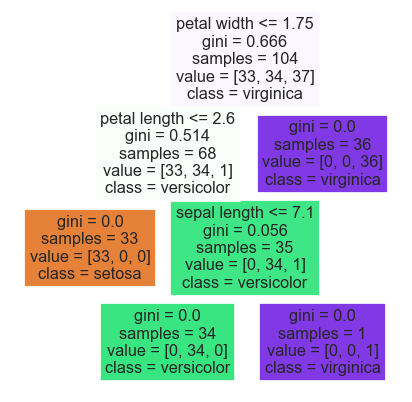

In [572]:
# visualize the decistions
from sklearn import tree


fn=['sepal length','sepal width','petal length','petal width']
cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=125)
tree.plot_tree(dt_clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('dec_tree.png')

In [573]:
# create a dataframe for comparison of actual vs predicted
results = pd.DataFrame({'species':y_test['species'], 'prediction':y_predictions})
results.head(10)

,species,prediction
133,Iris-virginica,Iris-versicolor
109,Iris-virginica,Iris-virginica
59,Iris-versicolor,Iris-versicolor
80,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
104,Iris-virginica,Iris-virginica
140,Iris-virginica,Iris-virginica
95,Iris-versicolor,Iris-versicolor
118,Iris-virginica,Iris-versicolor
84,Iris-versicolor,Iris-versicolor


Some predictions are wrong. Check prediction accuracy

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        16
Iris-versicolor      0.789     0.938     0.857        16
 Iris-virginica      0.900     0.692     0.783        13

       accuracy                          0.889        45
      macro avg      0.896     0.877     0.880        45
   weighted avg      0.896     0.889     0.886        45



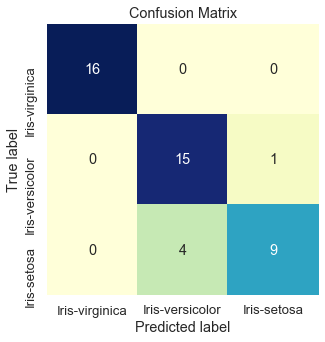

In [574]:
check_accuracy(y_test, y_predictions)


Each row represents the instances of an actual class (true label) and each column represents the instances of a predicted class.<br>
1 versicolor incorrectly classified as setosa. 4 setosa incorrectly classified as versicolor. All others are correctly classified<br>

proportion of classes correctly classified <br>
  **accuracy = correct classifications/total** = 40/45 = 89%<br>

proportion of predicted Positives is truly Positive <br>
   **precision = TP/(TP+FP)** 
for versicolor: 15/(15 + 4)= 78.9%<br>
Use if the costs of False Positive is high. Ex: spam detection, false positives where non-spam is identified as spam results in loss of important email. Here you want high precision.
   
proportion of actual Positives correctly classified <br>
   **recall = TP/(TP + FN)** <br>
   for versicolor: 15/(15 + 1) = 93.8% <br>
Use when there is a high cost associated with False Negative. Ex. Cancer diagnosis. A patient with cancer (Actual Positive) is predicted as not having cancer (Predicted Negative).  Here you want high recall.
   
provides a single score that balances both precision and recall<br>
   **F-Measure = 2 * (precision * recall)/(precision + recall)**<br>
   for versicolor: 2 * (.789 * .938)/(.789 + .938) = 85.7%


#### k-nearest neighbors

k-nearest neighbours is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbours from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbours is taken to be the class for the encountered example.

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        16
Iris-versicolor      0.833     0.938     0.882        16
 Iris-virginica      0.909     0.769     0.833        13

       accuracy                          0.911        45
      macro avg      0.914     0.902     0.905        45
   weighted avg      0.914     0.911     0.910        45



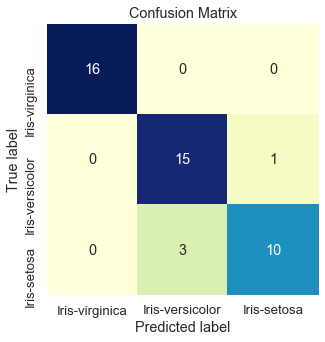

In [575]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train,  y_train)

y_predictions = knn_clf.predict(X_test)

check_accuracy(y_test, y_predictions)


#### Naive Bayes classifier 

Naive Bayes classification method is based on Bayes’ theorem. 

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        16
Iris-versicolor      0.789     0.938     0.857        16
 Iris-virginica      0.900     0.692     0.783        13

       accuracy                          0.889        45
      macro avg      0.896     0.877     0.880        45
   weighted avg      0.896     0.889     0.886        45



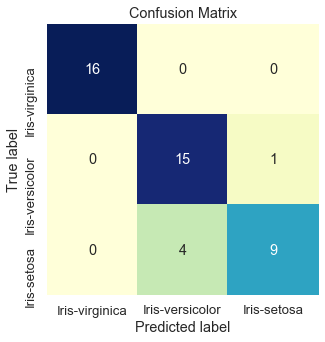

In [576]:
nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train) 

y_predictions = nb_clf.predict(X_test) 
  
check_accuracy(y_test, y_predictions)
    

#### SVM and Multinomial logistic regression

On their own, logistic regression and svm are binary classifiers.
One approach for using binary classification algorithms for multi-classification problems is to split the multi-class classification dataset into multiple binary classification datasets and fit a binary classification model on each. Two different examples of this approach are the One-vs-Rest and One-vs-One strategies.

**svm (support vector machine) using One-Vs-One for Multi-Class Classification**<br><br>

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        16
Iris-versicolor      0.842     1.000     0.914        16
 Iris-virginica      1.000     0.769     0.870        13

       accuracy                          0.933        45
      macro avg      0.947     0.923     0.928        45
   weighted avg      0.944     0.933     0.932        45



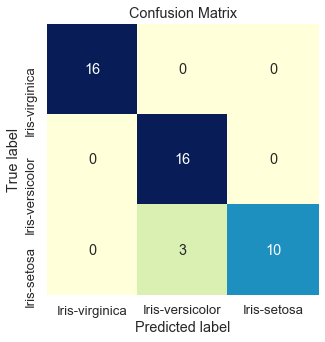

In [577]:
#svm_clf = SVC(kernel = 'linear', C = 1)
svm_clf = SVC(decision_function_shape='ovo')

svm_clf.fit(X_train, y_train)   

y_predictions = svm_clf.predict(X_test) 

check_accuracy(y_test, y_predictions)


**Multinomial logistic regression**<br><br>


                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        16
Iris-versicolor      0.833     0.938     0.882        16
 Iris-virginica      0.909     0.769     0.833        13

       accuracy                          0.911        45
      macro avg      0.914     0.902     0.905        45
   weighted avg      0.914     0.911     0.910        45



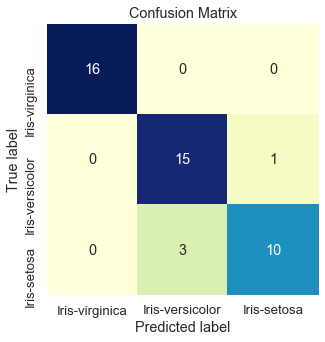

In [579]:
# Create one-vs-rest logistic regression object
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=0)

mul_lr.fit(X_train, y_train)

y_predictions = mul_lr.predict(X_test)

check_accuracy(y_test, y_predictions)

#### Random Forest Classifier

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        16
Iris-versicolor      0.789     0.938     0.857        16
 Iris-virginica      0.900     0.692     0.783        13

       accuracy                          0.889        45
      macro avg      0.896     0.877     0.880        45
   weighted avg      0.896     0.889     0.886        45



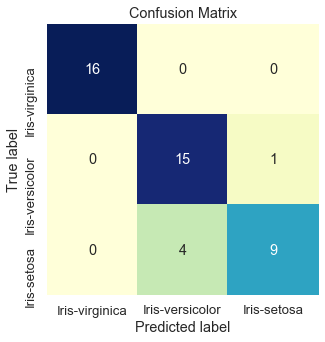

In [580]:
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0)

rf_clf.fit(X_train,y_train)

y_predictions = rf_clf.predict(X_test)

check_accuracy(y_test, y_predictions)
